# BMW Car Sales Analysis & Classification

## 1. 📌 Objective

Classify BMW car models into **High** or **Low** sales categories based on features like model, price, region, and fuel type.  
Explore which features influence sales performance.


## 2. 🗂️ Dataset Overview

**Features Description:**

- `Model`: BMW car model (e.g., X1, i8, M3)  
- `Year`: Manufacturing year (2010–2024)  
- `Region`: Geographic sales region  
- `Color`: Exterior car color  
- `Fuel_Type`: Petrol, Diesel, Hybrid, Electric  
- `Transmission`: Manual / Automatic  
- `Engine_Size_L`: Engine capacity in liters  
- `Mileage_KM`: Vehicle mileage  
- `Price_USD`: Price in US dollars  
- `Sales_Volume`: Units sold  
- `Sales_Classification`: Target variable (High / Low)


In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Check files in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load dataset
df = pd.read_csv('/kaggle/input/bmw-car-sales-classification-dataset/BMW_Car_Sales_Classification.csv')
df.head()


/kaggle/input/bmw-car-sales-classification-dataset/BMW_Car_Sales_Classification.csv


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


## 3. 🔍 Data Cleaning

- Check for missing values
- Check for duplicates
- Verify and fix data types if needed


In [2]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check data types
print("Data types:")
print(df.dtypes)


Missing values per column:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64
Number of duplicate rows: 0
Data types:
Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object


## 4. 📊 Exploratory Data Analysis (EDA)

- Visualize sales trends over the years
- Analyze sales distribution by region and model
- Plot price distribution and its relation to sales classification
- Study impact of fuel type on sales


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


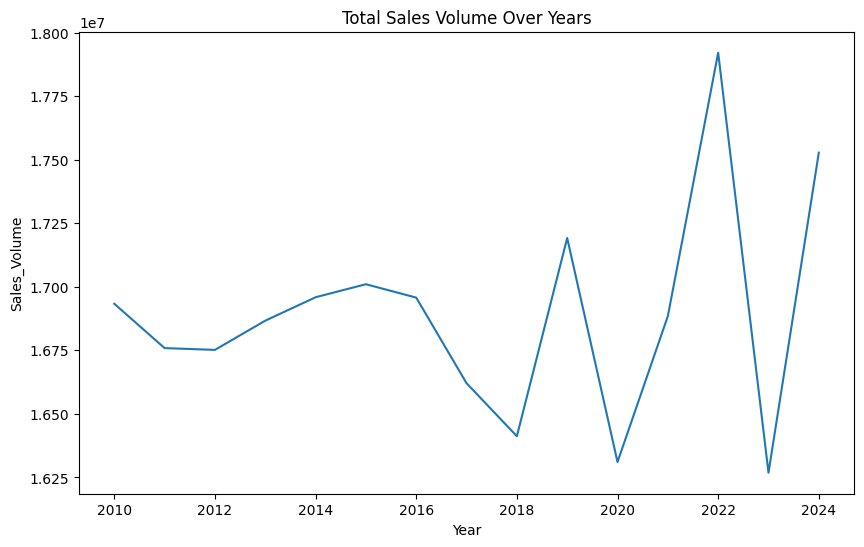

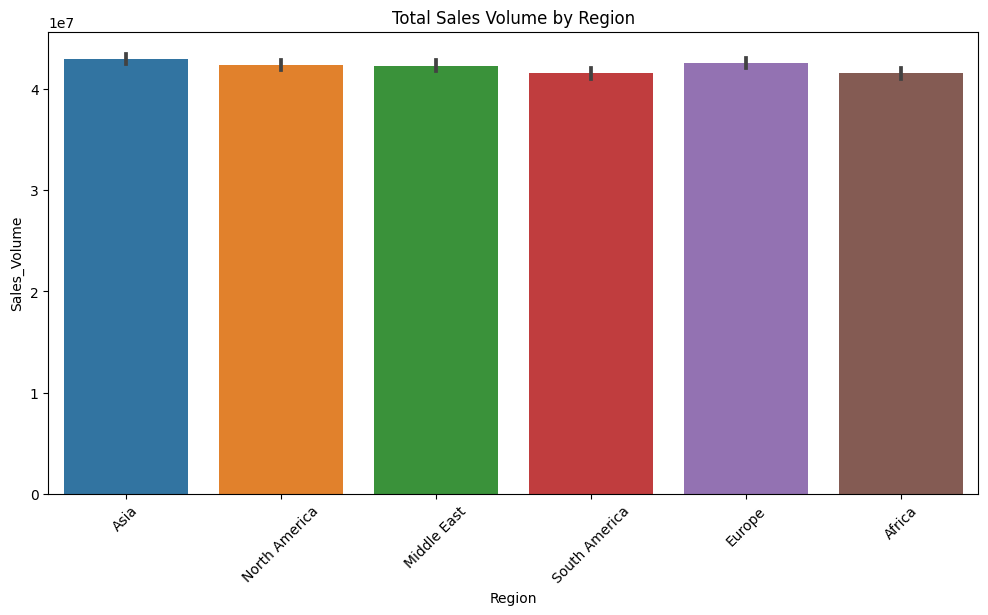

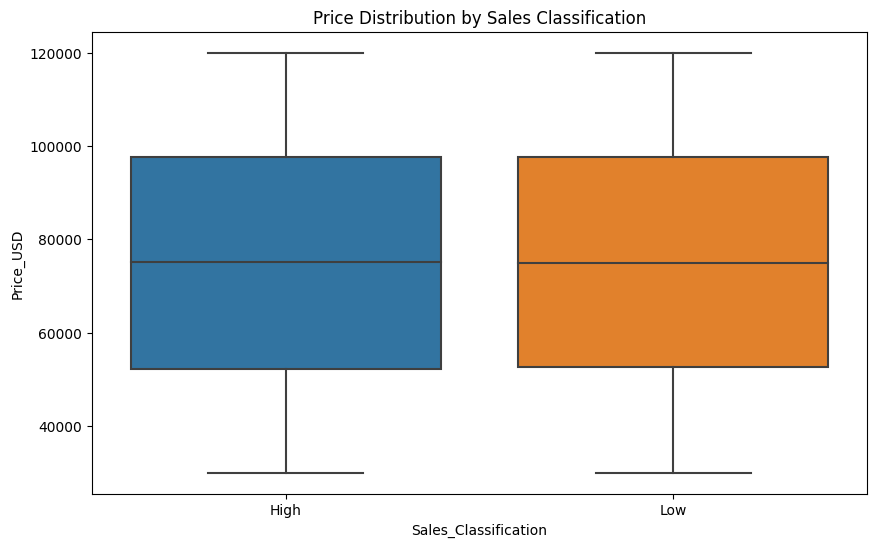

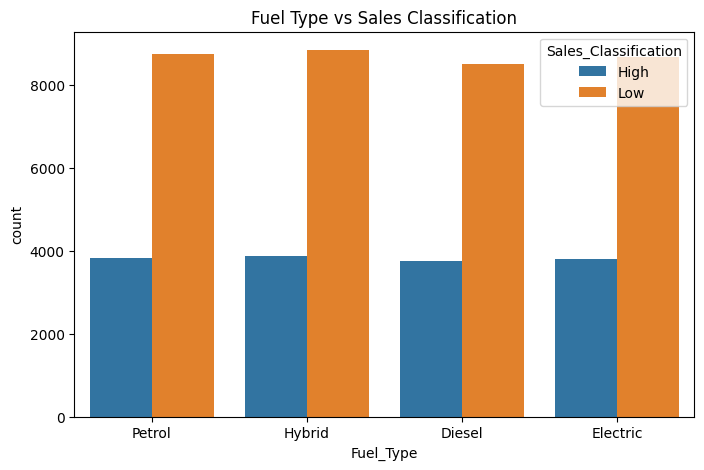

In [3]:
# Convert 'Year' to int if needed
df['Year'] = df['Year'].astype(int)

# Sales volume over years
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('Year')['Sales_Volume'].sum().reset_index(), x='Year', y='Sales_Volume')
plt.title('Total Sales Volume Over Years')
plt.show()

# Sales by Region
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Sales_Volume', data=df, estimator=sum)
plt.title('Total Sales Volume by Region')
plt.xticks(rotation=45)
plt.show()

# Price distribution by Sales Classification
plt.figure(figsize=(10,6))
sns.boxplot(x='Sales_Classification', y='Price_USD', data=df)
plt.title('Price Distribution by Sales Classification')
plt.show()

# Fuel Type impact on Sales Classification
plt.figure(figsize=(8,5))
sns.countplot(x='Fuel_Type', hue='Sales_Classification', data=df)
plt.title('Fuel Type vs Sales Classification')
plt.show()


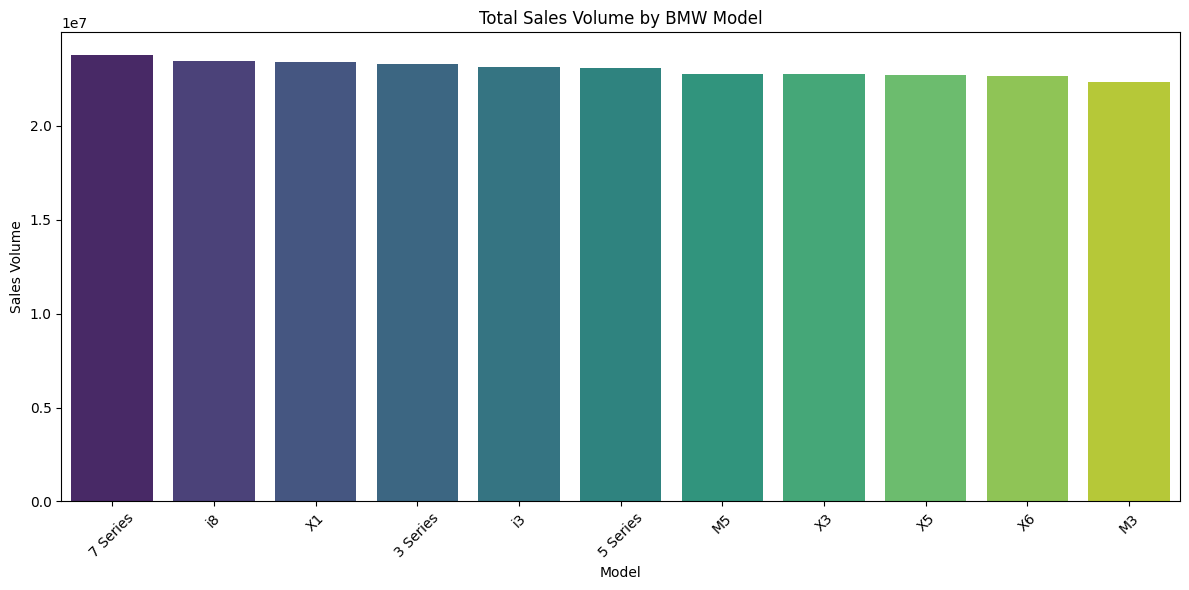

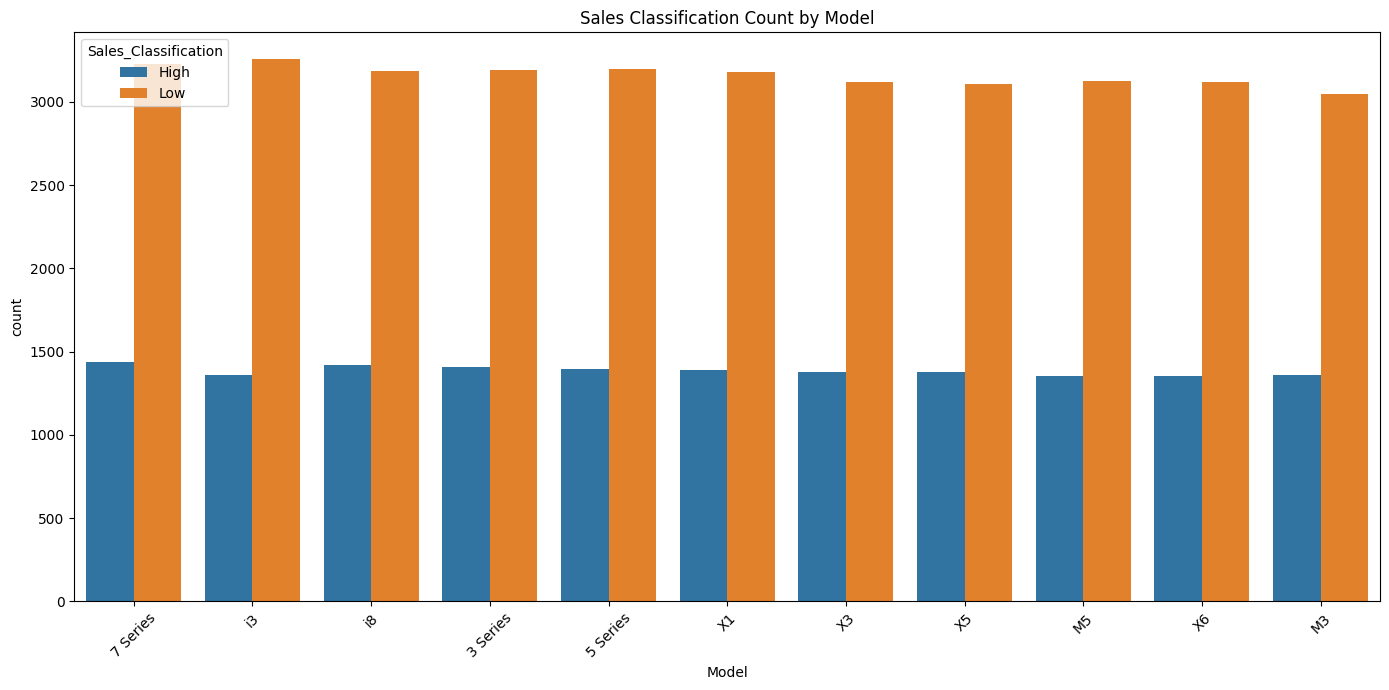

In [4]:
# Total sales volume per model
plt.figure(figsize=(12,6))
model_sales = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False)
sns.barplot(x=model_sales.index, y=model_sales.values, palette='viridis')
plt.title('Total Sales Volume by BMW Model')
plt.ylabel('Sales Volume')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count of sales classification per model
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='Model', hue='Sales_Classification', order=df['Model'].value_counts().index)
plt.title('Sales Classification Count by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
# Group by Model and Sales_Classification, summing sales volume
model_class_sales = df.groupby(['Model', 'Sales_Classification'])['Sales_Volume'].sum().reset_index()

# Separate High and Low Sales
high_sales_df = model_class_sales[model_class_sales['Sales_Classification'] == 'High']
low_sales_df = model_class_sales[model_class_sales['Sales_Classification'] == 'Low']

# Top 5 in High Sales
top_high = high_sales_df.sort_values(by='Sales_Volume', ascending=False).head(5)

# Bottom 5 in High Sales
bottom_high = high_sales_df.sort_values(by='Sales_Volume', ascending=True).head(5)

# Top 5 in Low Sales
top_low = low_sales_df.sort_values(by='Sales_Volume', ascending=False).head(5)

# Bottom 5 in Low Sales
bottom_low = low_sales_df.sort_values(by='Sales_Volume', ascending=True).head(5)

# Show tables
print("🏆 Top 5 Performers in High Sales")
display(top_high)

print("⚠️ Bottom 5 Performers in High Sales")
display(bottom_high)

print("🏆 Top 5 Performers in Low Sales")
display(top_low)

print("⚠️ Bottom 5 Peformers in Low Sales")
display(bottom_low)


🏆 Top 5 Performers in High Sales


,Model,Sales_Classification,Sales_Volume
4,7 Series,High,12190393
20,i8,High,12073577
0,3 Series,High,11919838
2,5 Series,High,11879778
10,X1,High,11847092


⚠️ Bottom 5 Performers in High Sales


,Model,Sales_Classification,Sales_Volume
8,M5,High,11480135
16,X6,High,11525949
18,i3,High,11553973
6,M3,High,11597294
14,X5,High,11721869


🏆 Top 5 Performers in Low Sales


,Model,Sales_Classification,Sales_Volume
5,7 Series,Low,11596073
19,i3,Low,11579876
11,X1,Low,11558968
1,3 Series,Low,11361465
21,i8,Low,11350314


⚠️ Bottom 5 Peformers in Low Sales


,Model,Sales_Classification,Sales_Volume
7,M3,Low,10752400
13,X3,Low,10982598
15,X5,Low,10987880
17,X6,Low,11136037
3,5 Series,Low,11217741


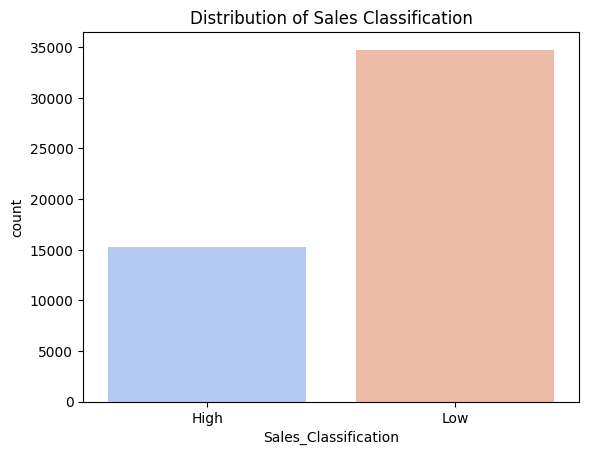

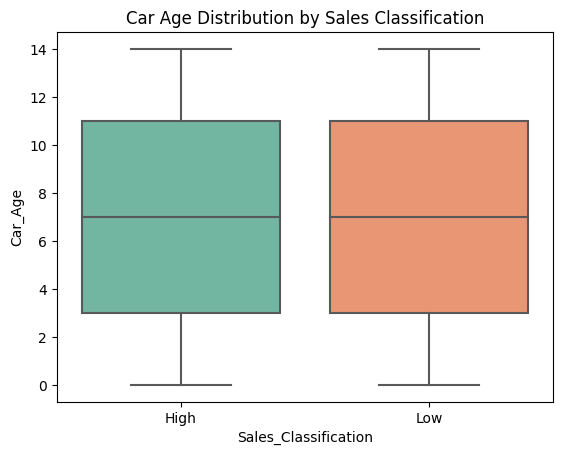

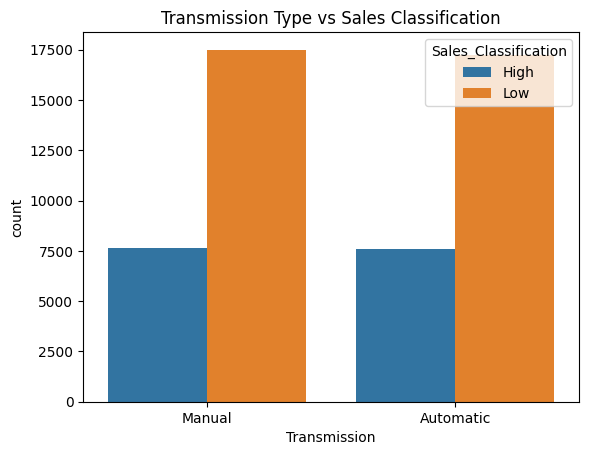

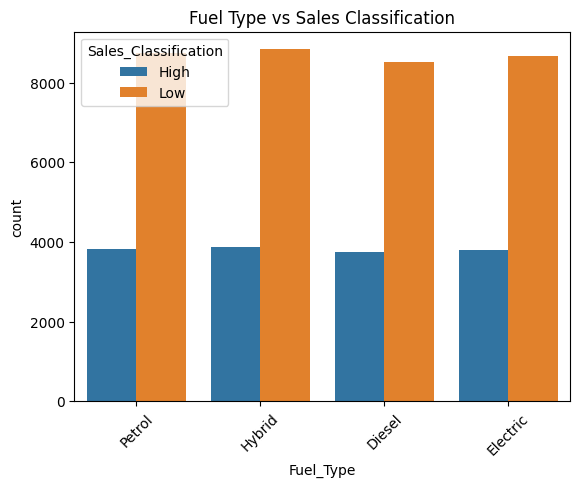

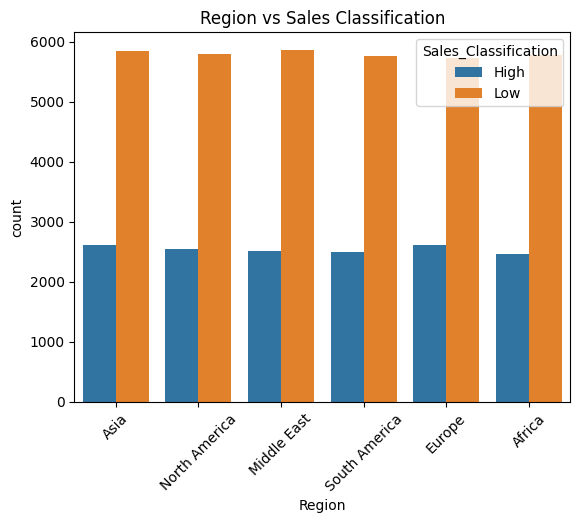

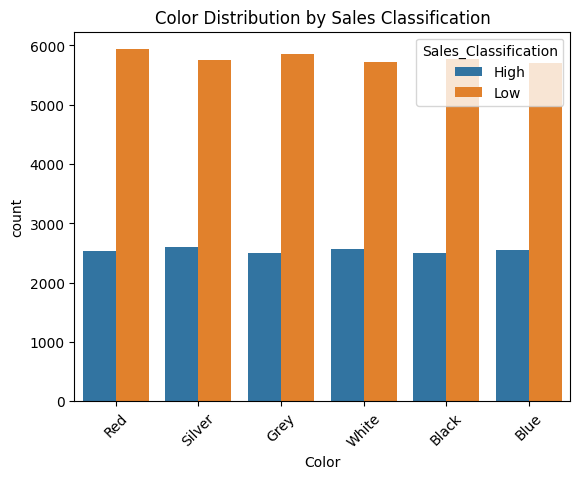

Sales_Classification,High,Low
Model,,
7 Series,12190393,11596073
i8,12073577,11350314
3 Series,11919838,11361465
5 Series,11879778,11217741
X1,11847092,11558968
X3,11762931,10982598
X5,11721869,10987880
M3,11597294,10752400
i3,11553973,11579876


In [6]:
# Count plot for Sales_Classification
sns.countplot(x='Sales_Classification', data=df, palette='coolwarm')
plt.title("Distribution of Sales Classification")
plt.show()

# Create Car_Age feature
df['Car_Age'] = 2024 - df['Year']

# Compare Car_Age by Sales_Classification
sns.boxplot(x='Sales_Classification', y='Car_Age', data=df, palette='Set2')
plt.title("Car Age Distribution by Sales Classification")
plt.show()


# Count plot for Transmission by Sales Classification
sns.countplot(x='Transmission', hue='Sales_Classification', data=df)
plt.title("Transmission Type vs Sales Classification")
plt.show()

# Fuel Type vs Premium Value

sns.countplot(x='Fuel_Type', hue='Sales_Classification', data=df)
plt.title("Fuel Type vs Sales Classification")
plt.xticks(rotation=45)
plt.show()

# Region vs Premium Value
sns.countplot(x='Region', hue='Sales_Classification', data=df)
plt.title("Region vs Sales Classification")
plt.xticks(rotation=45)
plt.show()

# Color Preferences in Premium vs Low Sales

sns.countplot(x='Color', hue='Sales_Classification', data=df,
              order=df['Color'].value_counts().index)
plt.title("Color Distribution by Sales Classification")
plt.xticks(rotation=45)
plt.show()

#Model-Level Performance

# Aggregate by Model and Sales Classification
model_sales = df.groupby(['Model', 'Sales_Classification'])['Sales_Volume'].sum().reset_index()

# Pivot for easier comparison
pivot_model_sales = model_sales.pivot(index='Model', columns='Sales_Classification', values='Sales_Volume').fillna(0)

# Sort by High Sales
pivot_model_sales.sort_values(by='High', ascending=False).head(10)



## 5. Feature Engineering

- Create `Car_Age` = 2025 - Year
- One-hot encode categorical variables (`Model`, `Region`, `Fuel_Type`, `Transmission`, `Color`)
- Scale numerical features if needed


In [7]:
# Create Car_Age
df['Car_Age'] = 2025 - df['Year']

# One-hot encode categorical features
categorical_cols = ['Model', 'Region', 'Fuel_Type', 'Transmission', 'Color']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Preview new dataframe shape
print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")

df_encoded.head()


Original shape: (50000, 12)
Encoded shape: (50000, 31)


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age,Model_5 Series,Model_7 Series,Model_M3,...,Region_South America,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White
0,2016,3.5,151748,98740,8300,High,9,True,False,False,...,False,False,False,True,True,False,False,True,False,False
1,2013,1.6,121671,79219,3428,Low,12,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,2022,4.5,10991,113265,6994,Low,3,True,False,False,...,False,False,False,True,False,True,False,False,False,False
3,2024,1.7,27255,60971,4047,Low,1,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4,2020,2.1,122131,49898,3080,Low,5,False,True,False,...,True,False,False,False,True,False,False,False,False,False


## 6. 🧠 Machine Learning Model

- Split dataset into training and testing sets
- Use Random Forest classifier as baseline
- Evaluate model performance using accuracy and F1-score


Accuracy: 0.6893
F1 Score: 0.0312

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.98      0.81      6951
           1       0.32      0.02      0.03      3049

    accuracy                           0.69     10000
   macro avg       0.51      0.50      0.42     10000
weighted avg       0.58      0.69      0.58     10000



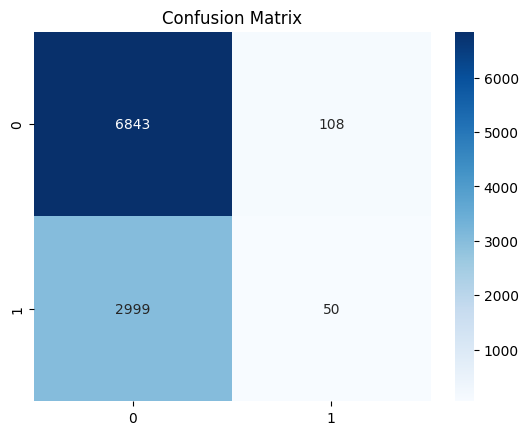

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Prepare features and target
X = df_encoded.drop(['Sales_Classification', 'Sales_Volume'], axis=1)
y = df_encoded['Sales_Classification'].apply(lambda x: 1 if x=='High' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## **7. 🧾 Insights & Conclusion**

---

### ✅ **Observations**
1. **Sales Trend**
   - Sales volumes peaked around **2018** and **2022**, indicating strong performance in those years.
   - The trend is **non-linear**, showing ups and downs likely influenced by market dynamics or BMW’s internal strategies.

2. **Regional Distribution**
   - All regions have **similar sales volumes**, reflecting BMW’s **balanced global market presence**.
   - No single region dominates premium or low-value classifications.

3. **Fuel Type**
   - Across all fuel types (Petrol, Hybrid, Diesel, Electric), **Low sales dominate**.
   - Fuel type alone does **not strongly influence premium classification**.

4. **Car Age**
   - Premium (High Sales) cars are **younger** (median ~6 years), while Low Sales cars are older (median ~9 years).

5. **Transmission**
   - **Automatic cars** dominate premium segments.
   - Manual transmission is more common in low-value sales.

6. **Color**
   - Color preferences are evenly distributed between High and Low sales.
   - **Color is not a key premium indicator**.

7. **Model-Level Performance**
   - **Top Premium Performers**: 7 Series, i8, 3 Series, 5 Series, X1.
   - **Bottom Premium Performers**: M5, X6, i3, M3, X5.
   - Several premium models (7 Series, i8, 3 Series) also appear in Low Sales, indicating **brand dilution risk**.

---

### ✅ **Insights**
- **Premium buyers prioritize newness**: Newer models correlate strongly with High Sales.
- **Automatic transmission signals luxury**: Manuals dominate lower-value segments.
- **Fuel type and color are weak differentiators**: Marketing should highlight technology, performance, and design instead.
- **BMW has a balanced global footprint**: No regional dependence on premium share.
- **Brand exclusivity at risk**: Overlap of flagship models in low-value segments reduces perceived luxury.

---

### ✅ **Conclusion**
BMW’s overall strategy is globally balanced and product-diverse, but **premium status is not determined by fuel type or color**. Instead, it hinges on **model positioning, transmission type, and model freshness**.  

To strengthen its premium market position, BMW should:  
✔ **Differentiate premium trims** to avoid overlap with low-value segments.  
✔ **Accelerate refresh cycles** and emphasize innovation in marketing.  
✔ **Phase out manual transmissions** in luxury models.  
✔ **Reposition underperforming models** (e.g., M5, X6) while leveraging learnings from top premium performers (7 Series, i8).  

---
